# Exploratory Analysis over Federal Emergencies and Disasters

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset Details

The dataset is from kaggle repository (https://www.kaggle.com/fema/federal-disasters) and contains 63 years of Federal Disasters. The file database.csv contains 46,184 rows and 14 columns. This dataset begins with the year 1953, and runs up to the year 2017. Each row corresponds to an emergency declared by the president due to a natural disaster all around the US. The columns of the data-set are:
- Declaration Number - Unique number for each emergency declared
- Declaration Type - Type of declaration
- Declaration Date - Date of declaration
- State - State affected
- County - County affected
- Disaster Type 
- Disaster Title
- Start Date - The date event started
- End Date - The date event ended
- Close Date - End of Declaration
- Individual Assistance Program - Whether IAP was provided or not?
- Individuals & Households Program - Whether IHP was provided or not?
- Public Assistance Program - Whether PAP was provided or not?
- Hazard Mitigation Program - Whether HMP was provided or not?


In [4]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset
The Python code below reads the Federal Emergencies and Disasters dataset into a Pandas data frame with the name df_data. 


In [5]:
#read the csv file into a Pandas data frame
df_data = pd.read_csv('/content/drive/MyDrive/Engineering/MS/Data Minning 5334/Cyriac_6541_PA1/database.csv', encoding='latin1')

#return the first 5 rows of the dataset
df_data.head()

,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Close Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program
0,DR-1,Disaster,05/02/1953,GA,NaN,Tornado,Tornado,05/02/1953,05/02/1953,06/01/1954,Yes,No,Yes,Yes
1,DR-2,Disaster,05/15/1953,TX,NaN,Tornado,Tornado and Heavy Rainfall,05/15/1953,05/15/1953,01/01/1958,Yes,No,Yes,Yes
2,DR-3,Disaster,05/29/1953,LA,NaN,Flood,Flood,05/29/1953,05/29/1953,02/01/1960,Yes,No,Yes,Yes
3,DR-4,Disaster,06/02/1953,MI,NaN,Tornado,Tornado,06/02/1953,06/02/1953,02/01/1956,Yes,No,Yes,Yes
4,DR-5,Disaster,06/06/1953,MT,NaN,Flood,Floods,06/06/1953,06/06/1953,12/01/1955,Yes,No,Yes,Yes


# Statistical Exploratory Data Analysis

In [11]:

print (">>Details of df_data data frame are: \n", df_data.info() ) 

num_rows = df_data.shape[0]
num_cols = df_data.shape[1]
print ("\n\n>>Number of rows:%s and number of columns:%s" % (num_rows, num_cols)) 


print ("\n\n>>Descriptive details of 'Start Date' column are\n",df_data['Start Date'].describe())

disaster_title_list  = df_data['Disaster Title'].unique()
unique_county_list = df_data['County'].dropna().unique()

print("Unique diasaters: ",disaster_title_list)
print("\nUnique diasaters: ",unique_county_list) 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46185 entries, 0 to 46184
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Declaration Number                46185 non-null  object        
 1   Declaration Type                  46185 non-null  object        
 2   Declaration Date                  46185 non-null  object        
 3   State                             46185 non-null  object        
 4   County                            45988 non-null  object        
 5   Disaster Type                     46185 non-null  object        
 6   Disaster Title                    46185 non-null  object        
 7   Start Date                        46185 non-null  datetime64[ns]
 8   End Date                          45843 non-null  datetime64[ns]
 9   Close Date                        35210 non-null  object        
 10  Individual Assistance Program     46185 non-nu

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  if __name__ == '__main__':


# Aggregation & Filtering & Rank


In [12]:

df_Temp_1 = df_data.iloc[:,:]
df_Temp_1['Start Date'] = pd.to_datetime(df_Temp_1['Start Date'])
df_Temp_1['End Date'] = pd.to_datetime(df_Temp_1['End Date'])
rang = ((df_Temp_1['End Date'] - df_Temp_1['Start Date']).dt.days)> 120
df=df_Temp_1.loc[rang]
df1=df.loc[df['Declaration Type']=='Emergency']
Emergency_greater_120 =df1['Disaster Title'].unique()

print (">> The declaration titles of type 'Emergency' which lasted more than 120 days are %s" 
       % (Emergency_greater_120))


df_Temp_2 = df_data.iloc[:,:]
df_Temp_2['End Date'] = pd.to_datetime(df_Temp_2['End Date'])
df_Temp_2['Start Date'] = pd.to_datetime(df_Temp_2['Start Date'])
df_Temp_2 = df_Temp_2.loc[df_Temp_2['Individual Assistance Program'] == 'Yes']
df_Temp_2 = df_Temp_2.loc[df_Temp_2['State'] == 'TX']
start_date = '01-01-1998'
end_date = '01-01-1999'
rang = (df_Temp_2['End Date'] >= start_date) & (df_Temp_2['Start Date'] < end_date)
num_declarations_1998_1999 = len(df_Temp_2.loc[rang])

print ("\n\n>> The total number of declarations in 1998-1999 for the state of Texas were %s" 
       % (num_declarations_1998_1999))

n = 10

df_Disaster = df_data.loc[df_data['Declaration Type'] == "Disaster"]
top10_disasters = pd.value_counts(df_Disaster['County'], sort = True)
top10_disasters = top10_disasters.head(n).index.tolist()

df_Emergency = df_data.loc[df_data['Declaration Type'] == "Emergency"]
top10_emergencies = pd.value_counts(df_Emergency['County'], sort = True)
top10_emergencies = top10_emergencies.head(n).index.tolist()

print ("\n\n>>Top 10 counties with the most disasters for all years are: \n%s" % (top10_disasters))
print ("\n\n>>Top 10 counties with the most emergencies for all years are: \n%s" % (top10_emergencies))




>> The declaration titles of type 'Emergency' which lasted more than 120 days are ['Extreme  Fire Hazard' 'Fire' 'Extreme Fire Hazards' 'West Nile Virus'
 'Drought' 'Wildfires']


>> The total number of declarations in 1998-1999 for the state of Texas were 305


>>Top 10 counties with the most disasters for all years are: 
['Washington County', 'Jefferson County', 'Jackson County', 'Franklin County', 'Lincoln County', 'Clay County', 'Madison County', 'Montgomery County', 'Monroe County', 'Marion County']


>>Top 10 counties with the most emergencies for all years are: 
['Washington County', 'Franklin County', 'Jackson County', 'Jefferson County', 'Montgomery County', 'Monroe County', 'Lincoln County', 'Madison County', 'Warren County', 'Marion County']


# Visualization


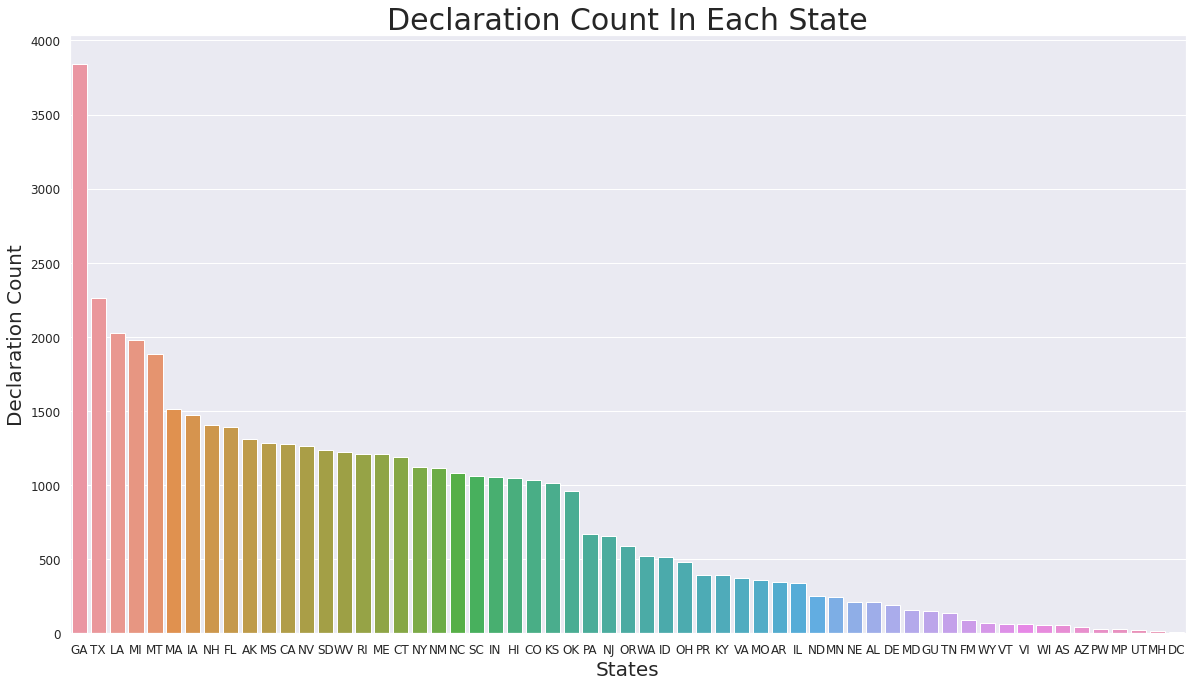

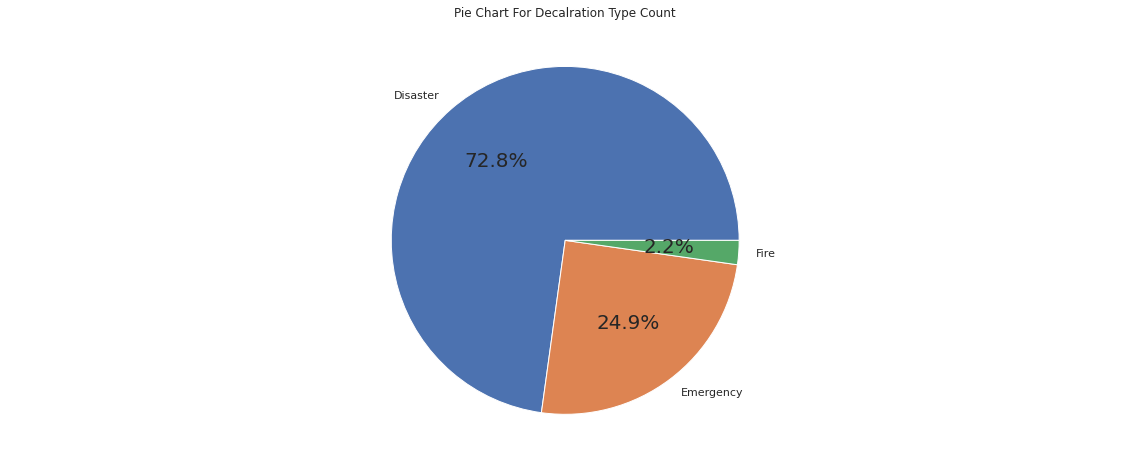

In [8]:

Declaration_Count = pd.value_counts(df_data['State'], sort = True)
States = df_data['State'].unique()
sns.set(rc={'figure.figsize':(20,11)})
graph=sns.barplot(x = States, y = Declaration_Count)
graph.axes.set_title("Declaration Count In Each State", fontsize=30)
graph.set_xlabel("States", fontsize=20)
graph.set_ylabel("Declaration Count", fontsize=20)
graph.tick_params(labelsize=12)
plt.show()

x = pd.value_counts(df_data['Declaration Type'], sort = True)
y = df_data['Declaration Type'].unique()
plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams['font.size'] = 20.0
plt.axis("equal")
plt.title('Pie Chart For Decalration Type Count')
plt.pie( x, labels = y, radius = 1, autopct = '%1.1f%%' )
plt.show()


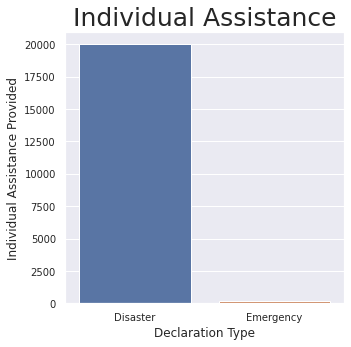

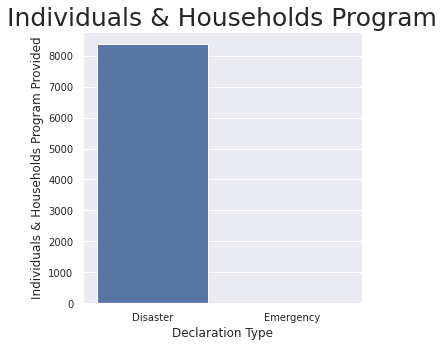

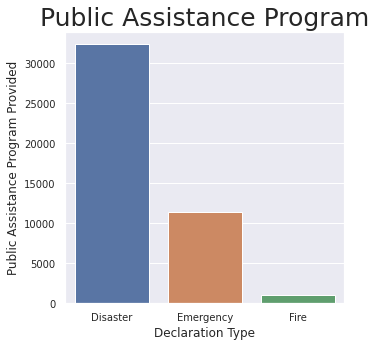

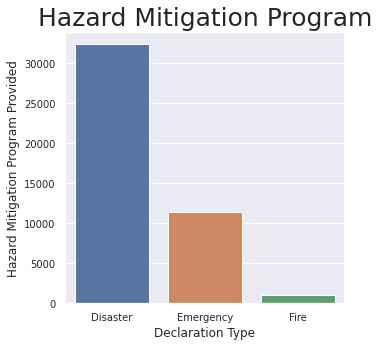

In [9]:



IAP = df_data.loc[df_data['Individual Assistance Program'] == 'Yes']
y = IAP['Declaration Type'].value_counts(dropna='False', sort = True)
x = IAP['Declaration Type'].unique()
sns.set(rc={'figure.figsize':(5,5)})
graph = sns.barplot(x = x, y = y ,  linewidth=1)
graph.axes.set_title("Individual Assistance", fontsize=25)
graph.set_xlabel("Declaration Type", fontsize=12)
graph.set_ylabel("Individual Assistance Provided", fontsize=12)
graph.tick_params(labelsize=10)
plt.show()

IHP = df_data.loc[df_data['Individuals & Households Program'] == 'Yes']
y = IHP['Declaration Type'].value_counts(dropna='False', sort = True)
x = IHP['Declaration Type'].unique()
sns.set(rc={'figure.figsize':(5,5)})
graph = sns.barplot(x = x, y = y ,  linewidth=1)
graph.axes.set_title("Individuals & Households Program", fontsize=25)
graph.set_xlabel("Declaration Type", fontsize=12)
graph.set_ylabel("Individuals & Households Program Provided", fontsize=12)
graph.tick_params(labelsize=10)
plt.show()

PAP = df_data.loc[df_data['Public Assistance Program'] == 'Yes']
y = PAP['Declaration Type'].value_counts(dropna='False', sort = True)
x = PAP['Declaration Type'].unique()
sns.set(rc={'figure.figsize':(5,5)})
graph = sns.barplot(x = x, y = y ,  linewidth=1)
graph.axes.set_title("Public Assistance Program", fontsize=25)
graph.set_xlabel("Declaration Type", fontsize=12)
graph.set_ylabel("Public Assistance Program Provided", fontsize=12)
graph.tick_params(labelsize=10)
plt.show()

HMP = df_data.loc[df_data['Hazard Mitigation Program'] == 'Yes']
y = PAP['Declaration Type'].value_counts(dropna='False', sort = True)
x = PAP['Declaration Type'].unique()
sns.set(rc={'figure.figsize':(5,5)})
graph = sns.barplot(x = x, y = y ,  linewidth=1)
graph.axes.set_title("Hazard Mitigation Program", fontsize=25)
graph.set_xlabel("Declaration Type", fontsize=12)
graph.set_ylabel("Hazard Mitigation Program Provided", fontsize=12)
graph.tick_params(labelsize=10)
plt.show()
